参考：

    机器学习及应用,王荣贵,机械工业出版社
    机器学习，周志华，清华大学出版社

机器学习模型本质上都可以看成是某种映射函数，作为初始模型的映射函数一般都包含若干未知参数，需要通过对样本的学习来确定参数的合理取值。因此，机器学习的过程就是解决这些参数的取值问题。

通常使用对目标函数进行优化计算的方式获得参数取值。如果初始模型比较简单，则模型求解的目标函数也比较简单。若目标函数为线性函数，可用单纯形法等常用线性规划方法获得精确解，然而，机器学习的模型主要为非线性函数或约束条件中含有的非线性函数，属于非线性规划问题。目前还没有针对此类优化计算问题的精确解法，而是使用具有针对线性的近似计算方法进行模型参数求解，构造具有一定精度的近似优化模型。

对于比较简单的非线性目标函数，通常使用**参数估计方式**直接对模型参数进行近似估计，对于较为复杂的非线性目标函数，直接对其进行参数估计一般难以取得满意的效果，此时通常使用迭代计算或动态规划方式逐步优化模型参数估计值。此外，还需要采用一些特定策略对模型进行正则化处理以消除模型中存在的过拟合现象。

本章主要介绍模型优化近似计算方法，包括模型参数的基本估计方法，集中模型优化近似计算方法买入基本的近似优化方法和概率近似优化方法，及正则化的概念和常用策略。

# 模型参数估计
对于特定的机器学习任务，确定机器学习模型结构之后，给出不同的参数时，模型的性能一般会存在差异。如何选择一组参数使得模型对具体任务的表现达到最优，是参数估计要解决的主要问题。

在统计学中，根据从总体中抽取的随机样本来估计模型未知参数的过程被称为**参数估计**（parameter estimation）。 常用的参数估计方法有：**最小二乘估计，最大似然估计和最大后验估计**，其中最小二乘估计用于函数模型的参数估计，最大似然估计和最大后验估计常用于概率模型的参数估计。

## 最小二乘估计
最小二乘估计是一种基于误差平方和最小化的参数估计方法。对于线性模型，最小二乘估计量是一种具有最小方差的无偏估计量，由其求得的参数估计值是最优估计值。最小二乘估计计算简单、易于理解且具有良好的实际意义。因此，最小二乘法是对线性统计模型进行参数估计的基本方法。


### 算法原理
最小二乘估计（Ordinary Least Square，OLS），又称最小二乘法，它的核心思想是：最小化实际值与预测值之间的误差平方和，使得误差平方和最小的参数就是最优估计值。 以**线性**回归问题为例，其误差函数可以表示为：
$$\begin{eqnarray*}
\ell&=&\frac{1}{2m}\sum_{i=1}^{m}(y^{(i)}-w^Tx^{(i)})^2\\
&=&\frac{1}{2m}\lVert y-wX\rVert_2^2\\
&=&\frac{1}{2m}(y-wX)(y-wX)^T
\end{eqnarray*}$$
当目标函数取最小值时，所对应的模型参数为最优。设此时参数为$\hat w$，$$\hat w=arg_w min \ell$$函数极值点处对所有参数的偏导为0，故可由此求出最小二乘估计值。
$$\begin{eqnarray*}
\frac{\partial \ell}{\partial w}&=&\frac{\partial}{\partial w}\frac{1}{2m}(yy^T-2wXy^T+wXX^Tw^T)\\
&=&\frac{1}{2m}(-2Xy^T+2XX^Tw^T)=0\\
&\Leftrightarrow &-Xy^T+XX^Tw^T=0\\
&\Leftrightarrow &XX^Tw^T=Xy^T\\
&\Leftrightarrow &w=(X^TX)^{-1}X^Ty
\end{eqnarray*}$$
所求结果即是$\hat w$。
用平方和的原因是因为回归函数的预测值与真实值之差可正可负，简单求和可能出现误差抵消的情况，而采用平方误差既保证了非负性，也没有破坏误差关系。因此，最小二乘估计是回归问题中最常用的参数估计方法。

可见，最小二乘法（又称最小平方法）是一种数学优化技术，它通过最小化误差的平方和寻找数据的最佳函数匹配。利用最小二乘法可以简便地求得未知的数据，并使得这些求得的数据与实际数据之间误差的平方和为最小。


例子：有如下示例，产值Q和劳动力投入L之间满足$Q=aL^b$关系，其中$a,b$为未知参数。

In [1]:
import pandas as pd
import numpy as np
#在下面添加此代码以显示单元格中的所有输出
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity="all"

product={
    '年份':['2013','2014','2015','2016','2017'],
    '劳动力投入':[42,51,49,65,57],
    '产值':[188,210,194,207,221]
}
#定义数据库
proDf=pd.DataFrame(product)
proDf

,年份,劳动力投入,产值
0,2013,42,188
1,2014,51,210
2,2015,49,194
3,2016,65,207
4,2017,57,221


$Q=aL^b$不是线性关系，通过对数运算将其转化为线性关系;
$$lnQ=lna+blnL$$

令：
$y_i=lnQ,x_i=lnL,\beta _0=lna,\beta_1=b$，将样本改为形式
$$X_i=
\begin{eqnarray*}\left [\matrix{
1\\
x_i}
\right ] \end{eqnarray*}$$则有$$f(X)=\beta_0+\beta_1x_i=w^TX$$这里$w=[\beta_0,\beta_1]^T$，是需要求的参数。

依据最小二乘法，采用最小方差构造优化目标（$\ell$中的系数不影响结果，故省略）：$$\sum_0^4(f(X_i)-y_i)^2=\sum_0^4(\beta_0+\beta_1x_i-y_i)^2$$
分别对$\beta_0,\beta_1$求导并令导数值为0：
$$\frac{\partial \ell}{\partial \beta_0}=2\sum_0^4(\beta_0+\beta_1x_i-y_i)(-1)=0$$
$$\frac{\partial \ell}{\partial \beta_1}=2\sum_0^4(\beta_0+\beta_1x_i-y_i)(-x_i)=0$$


可转化为**一般形式**:
$$\beta_0N+\beta_1\sum x_i=\sum y_i$$
$$\beta_0\sum x_i+\beta_1\sum x_i^2=\sum x_iy_i$$其中N为样本数量。带入样本数据，可求解。

### python求参数代码
根据原理，求参数公式为$w=(X^TX)^{-1}X^Ty$，下面用python实现函数：

In [2]:
#在下面添加此代码以显示单元格中的所有输出
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity="all"

In [3]:
def standRegres(xArr,yArr):
    """
    函数说明:计算回归系数w
    Parameters:
        xArr - x数据集(第一列为1)
        yArr - y数据集
    Returns:
        ws - 回归系数
    """
    xMat = np.mat(xArr); yMat = np.mat(yArr).T    
    xTx = xMat.T * xMat                            #根据文中推导的公示计算回归系数
    #print(xMat.shape,xArr)
    if np.linalg.det(xTx) == 0.0:
        print("矩阵为奇异矩阵,不能求逆")
        return
    ws = xTx.I * xMat.T*yMat #w  公式
    return ws

x_=np.ones([proDf.shape[0],2])
x_[:,1]=np.array(np.log(proDf.iloc[:,1]))#提取两列数据，分别作为x,y
x_
y_=outValue=np.array(np.log(proDf.iloc[:,2]))
y_
ws=standRegres(x_,y_)
ws

array([[1.        , 3.73766962],
       [1.        , 3.93182563],
       [1.        , 3.8918203 ],
       [1.        , 4.17438727],
       [1.        , 4.04305127]])

array([5.23644196, 5.34710753, 5.26785816, 5.33271879, 5.3981627 ])

matrix([[4.19517866],
        [0.28345546]])

结果为$\beta_0=4.19517866,\beta_1=0.28345546$

In [4]:
np.exp(ws[0]),ws[1]

(matrix([[66.36558706]]), matrix([[0.28345546]]))

由此得到产值Q和劳动力投入L之间满足$Q=66.36L^{0.283}$关系

### python拟合直线实现

依据上面的一般形式，可求解。首先引入依赖

In [5]:
import numpy as np
import matplotlib.pyplot as plt

分别取proDf二维数组中的三列：年份、劳动力、产值等作为导入数据。

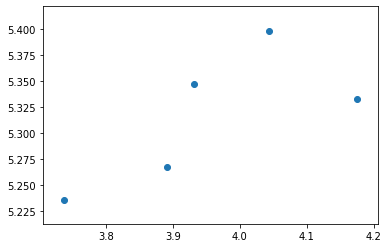

In [6]:
#year=proDf.iloc[:,0]
x=labor=np.log(proDf.iloc[:,1])#提取两列数据，分别作为x,y
y=outValue=np.log(proDf.iloc[:,2])
#用plt画出散点图
plt.scatter(x,y)
plt.show()

numpy 的 linalg 模块中有一个 $solve$函数，它可以根据方程组的系数矩阵和方程右端构成的向量来求解未知量$\beta_0$ 与 $\beta_1$。

In [7]:
def linear_regression(x, y): 
     N = len(x)
     sumx = sum(x)
     sumy = sum(y)
     sumx2 = sum(x**2)
     sumxy = sum(x*y)
 
     A = np.mat([[N, sumx], [sumx, sumx2]])
     b = np.array([sumy, sumxy])
 
     return np.linalg.solve(A, b)
 
b0,b1 = linear_regression(x,y)
b0,b1

(4.195178654999998, 0.28345546174325226)

利用最小二乘法的正则方程组来求解未知系数 $\beta_0$ 与 $\beta_1$,和上面的结果一样。

画出拟合曲线

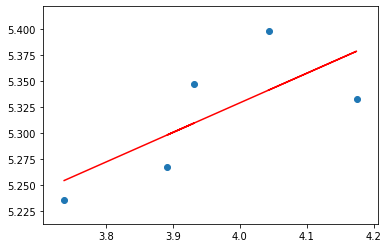

In [8]:
plt.scatter(x,y)
pred_y= b1*x+b0
plt.plot(x,pred_y,c='r')

计算损失$\ell$，如上知道公式$\ell=\frac{1}{2m}(y-wX)(y-wX)^T$

In [9]:
from numpy import *
#w=mat(array([b0,b1]))
wx=mat(ones([2,len(x)]))
wx[1,:]=array(x).T
pred_yi=array(y.T)-array((dot([b0,b1],wx)))#矩阵乘法
print(sum(pred_yi**2))
#也可以直接用上式的pred_y
print(sum((y-pred_y)**2))

0.0079952482363221
0.0079952482363221


### python拟合曲线实现

签数是以线性回归为例子，如果是拟合曲线，需要将上述一般式展开，成为下面的形式![jupyter](./img/model-1.png)
如曲线的方程为 $y = a_0 + a_1*x + a_2*x^2$，根据公式求解$ a_0、a_1 和 a_2$。

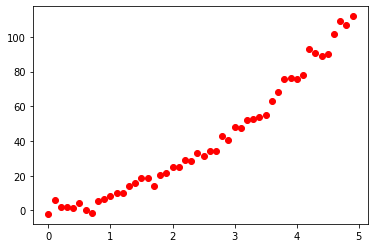

In [10]:
#生成服从正态分布的样本点
import numpy as np 
import matplotlib.pyplot as plt
 
# y = 2 + 3x + 4x^2
X = np.arange(0, 5, 0.1) 
Z = [2 + 3 * x + 4 * x ** 2 for x in X] 
Y = np.array([np.random.normal(z,3) for z in Z])
 
plt.plot(X, Y, 'ro') 
plt.show()


In [11]:
# 生成系数矩阵A
def gen_coefficient_matrix(X, Y): 
 N = len(X)
 m = 3
 A = []
 # 计算每一个方程的系数
 for i in range(m):
  a = []
  # 计算当前方程中的每一个系数
  for j in range(m):
   a.append(sum(X ** (i+j)))
  A.append(a)
 return A
 
# 计算方程组的右端向量b
def gen_right_vector(X, Y): 
 N = len(X)
 m = 3
 b = []
 for i in range(m):
  b.append(sum(X**i * Y))
 return b
 
A = gen_coefficient_matrix(X, Y) 
b = gen_right_vector(X, Y)
 
a0, a1, a2 = np.linalg.solve(A, b)

根据求得的曲线方程，绘制出曲线的图像。

Text(0.5, 1.0, 'y = 0.9374280078418962 + 2.857170913968501x + 4.06470591621364$x^2$ ')

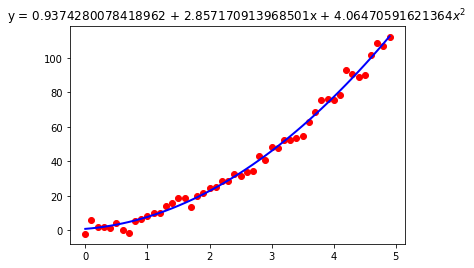

In [12]:
# 生成拟合曲线的绘制点
_X = np.arange(0, 5, 0.1) 
_Y = np.array([a0 + a1*x + a2*x**2 for x in _X])
 
plt.plot(X, Y, 'ro', _X, _Y, 'b', linewidth=2) 
plt.title("y = {} + {}x + {}$x^2$ ".format(a0, a1, a2)) 
plt.show()

## 最大似然估计

在概率模型中，最大似然估计（Maximum Likelihood Estimation，MLE）是最常用的参数估计方法。首先需要明白什么是似然，根据贝叶斯公式：
$$p(\theta∣X)=\frac{p(\theta,X)}{p(X)}=\frac{p(X∣\theta )p(\theta)}{p(X)}$$
其中，$p(X)$描述的是样本X的发生概率，对于给定样本X,，其值与参数$\theta$无关，因此，可以得到如下公式：$$p(\theta∣X)∝p(X∣\theta)p(\theta)$$
上式中，$p(\theta)$是参数先验（prior）概率，即在没有看到样本情况下，我们对模型的认知。

$p(X∣\theta)$是在给定参数$\theta$的情况下，样本产生的概率，称为**似然**（likelihood）。

$p(\theta∣X)$是参数的**后验（posterior）概率**，即在看到样本分布后，我们对模型认知的调整。

回到最大似然估计，顾名思义，就是要最大化似然函数，使得**似然函数最大的那组参数就是我们要找的最优参数**。 我们知道，对于样本空间，给定模型后，不同参数会对样本空间有不同的描述。现在我们只有从样本空间独立抽取的若干样本
$$X=\{x^{(1)},x^{(2)},\dots,x^{(m)}\}$$
需要判断哪组参数是对整个样本空间描述最好的那组参数，很自然的想法是最大化样本效益，即找到使得样本X产生概率最大的那组参数。因为样本X是已经观测到的，相当于我们的证据，选择对证据描述最好的那组参数肯定是最保险最稳妥的做法。

为什么要叫似然呢？我们要区分概率与似然：

    概率： 在给定参数的情况下，事件发生的可能性。
    似然： 在已知某些观测结果的情况下，参数取值的可能性。
可以看到概率和似然是两个完全不同的角度，概率是由因求果，似然是由果执因。概率要求满足概率之和等于1，但似然不要求满足归一性。两者的联系在于，似然的取值等于在给定参数的情况下，事件发生的概率。所以**似然函数是关于参数的函数**，其数学形式如下：
$$\ell(\theta | X)=p(X;\theta)$$
似然函数乘以一个正常数后仍然是似然函数，其取值并不需要满足归一性：$$\sum_\theta a\ell(\theta | X)\neq 1,a>1$$
对$\theta$的最大似然估计是：$$\theta_{ML}=argmax_\theta p(X;\theta)=argmax_\theta \prod_{i=1}^{M}p(x^{(i)};\theta)$$
多个概率的乘积可能出现数值下溢，常取对数将乘积转化为求和，得到最大对数似然：$$\theta_{ML}=argmax_\theta \prod_{i=1}^{M}log p(x^{(i)};\theta)$$

例子：假设一个盒子里有三颗围棋子，采用放回抽样随机抽取三次，得到白子2次，黑子1次。试用最大似然估计法估计盒子中白子个数。

设盒子中有$\theta$($\theta=0,1,2,3$)颗白子，$p(白|\theta)$为一次采样的概率，分别为0、1/3、2/3、3/3。由于三次采用中抽到了两次白子，则似然函数为$$\ell(\theta)=[p(白|\theta)]^2[1-p(白|\theta)]$$
$\theta=0,1,2,3$时，似然函数值分别为0、2/27、4/27、0。取最大的4/27，即$\theta=2$

当样本X为连续随机变量时，可**用其概率密度函数$f(X;\theta)$来构造似然函数**。即有
$$\ell(\theta|X)=\prod_{i=1}^{M}f(X_i;\theta)$$对似然函数进行最大优化计算，即可得到对参数$\theta$的估计值。这里，多个连续函数相乘，难以求解，同样采用对数似然函数的形式。

例子：下表为某学校的学生身高抽样，已知身高服从正态分布$N(u,\sigma^2)$。试根据抽样数据计算正态分布的参数$u,\sigma$。

In [13]:
import pandas as pd
student={
    '编号':[0,1,2,3,4,5,6,7,8,9],
    '身高(厘米)':[171,164,174,165,168,181,176,162,173,172]
}
#定义数据库
studentDf=pd.DataFrame(student)
studentDf

,编号,身高(厘米)
0,0,171
1,1,164
2,2,174
3,3,165
4,4,168
5,5,181
6,6,176
7,7,162
8,8,173
9,9,172


正态分布的概率密度为$$f(X_i;u,\sigma^2)=\frac{1}{\sqrt{2\pi}\sigma}exp\left [-\frac{(X-u)^2}{2\sigma^2}\right]$$

构造似然函数：$$\ell(\theta|X)=\prod_{i=0}^{9}f(X_i;\theta)=\prod_{i=0}^{9}f(X_i;u,\sigma^2)=\prod_{i=0}^{9}
\frac{1}{\sqrt{2\pi}\sigma}exp\left [-\frac{(X-u)^2}{2\sigma^2}\right]
$$

对数似然函数为：
$$ln\ell(\theta|X)=ln\ell(u,\sigma^2|X)=-5ln2\pi-10ln\sigma-\frac{\sum_{i=0}^9(X-u)^2}{2\sigma^2}
$$

对$ln\ell(\theta|X)$分别求$u,\sigma^2$求偏导并令其为0，可得：
$$\frac{\partial ln\ell(u,\sigma^2|X)}{\partial u}=
\frac{\sum_{i=0}^9(X_i-u)}{\sigma^2}=0
$$
$$\frac{\partial ln\ell(u,\sigma^2|X)}{\partial \sigma^2}=-\frac{5}{\sigma^2}+
\frac{\sum_{i=0}^9(X_i-u)^2}{2\sigma^4}=0
$$

解得：
$$\hat u=\bar X=\frac{1}{10}\sum_{i=0}^9X_i$$
$$\hat {\sigma^2}=\frac{1}{10}\sum_{i=0}^9(X_i-\bar X)^2$$

In [14]:
x_=np.array(studentDf.iloc[:,1])#提取两列数据，分别作为x,y
u=sum(x_)/10
sigma=sum((x_-u)**2)/10
u,sigma

(170.6, 31.240000000000002)

## 最小二乘估计与最大似然估计的联系
最小二乘估计用于函数模型的参数估计，最大似然估计常用于概率模型的参数估计，那最小二乘估计与最大似然估计有没有什么联系呢？对于回归问题，模型的输出直接是一个单独的实数值，其实我们也可以将其转化为一个概率问题，即在给定输入$x$的情况下，$y$取到取值空间中每个值得概率$p(y∣x)$，概率最大对应的$y$就是我们的预测。

## 最大后验估计
最大似然估计属于频率学派的观点，即参数未知，但取值固定，但贝叶斯学派认为参数不仅未知而且取值不固定，最大后验估计认为待求参数服从某一未知概率分布。**参数以一定的概率取某一特定值。**

在进行参数估计时，最大后验估计依据过往经验和已经出现的样本共同确定参数的可能取值。以抛硬币为例，现在期望估计硬币正面向上的概率$\theta$，依据以往经验，硬币正面向上的概率$\theta$一般是0.5，但是考虑到硬币个体可能存在某些特点，故没有将硬币概率确定为0.5，而是给出关于$\theta$取值的一个概率分布函数$g(\theta)$,如:
$$g(\theta)=
\begin{eqnarray*}\left \{\matrix{
0.9,\theta=0.5\\
0.1,\theta\neq0.5}
\right.  \end{eqnarray*}$$
$g(\theta)$被称为参数$\theta$的**先验概率分布或先验概率**，表示根据过往经验得到$\theta$取值的概率。假如抛掷10次硬币，7次正面，3次反面，则最大后验估计希望根据样本情况对参数值进行估计。即考虑在样本值已经出现的情况下计算$\theta$取值**条件概率**$f(\theta|X)$。

其中，$X$表示已经出现的样本取值情况，$f(\theta|X)$被称为后验概率。可以看成是根据样本数据出现的情况对先验概率$g(\theta)$的修正。**后验概率最大时所对应的参数取值即为所求的最大后验估计值。**既有$$\hat\theta=argmax_{\theta}f(\theta|X)$$

由贝叶斯公式，有：$$f(\theta|X)=\frac{f(X|\theta)g(\theta)}{p(X)}$$
$f(X|\theta)$为现有样本表现出来的信息，分母$p(X)$为样本的分布，$p(X)$与样本无关且恒大于0，故**可以直接用分子$f(X|\theta)g(\theta)$最大化的优化方式实现最大后验估计。**$$\hat \theta=argmax_{\theta}f(X|\theta)g(\theta)$$

本小节硬币例子中，$\theta=0.5$的情况下，“7次正面，3次反面”的条件概率为：$$f(X=7,3|\theta=0.5)=C_{10}^7\theta^7(1-\theta)^3=0.1171875$$
可得：$$f(X=7,3|\theta=0.5)g(\theta)=0.10546875$$由于是条件概率，故$$f(X=7,3|\theta\neq0.5)g(\theta)<0.1<f(X=7,3|\theta=0.5)g(\theta)$$
由此可知，最大后验估计$\hat \theta=0.5$。

通过分析可知，尽管已知样本的取值状况与过往经验不符合，但是由于过往经验比较可靠，故最大后验估计在结论上选择相信了经验而非实际样本所表现出来的信息，同时也说明样本这样的信息表现是由于随机波动造成的。如果使用最大似然估计，很可能得到的结果是$\hat \theta=0.7$。但是由于试验次数较少，结果可能存在较大的波动，这种情况下，如果只考虑最大似然估计，可能会与参数的真实值有较大的差异。

如果是**多参数情况**，可将最大后验估计表示为：$$\hat \beta=argmax_{\beta}f(X|\beta)g(\beta)$$也可以用等价的对数形式表示。其中$\beta=(\beta_1,\dots,\beta_k)$为未知参数向量。

例子：假设某公司过去三年员工收入服从均值为6（万元）、方差为0.36（万元）的正态分布。下表是随机抽取的10名员工的收入数据。根据表中数据和过去三年员工搜如情况，估计今年员工的均值和方差。

In [15]:
import pandas as pd
income={
    '编号':[1,2,3,4,5,6,7,8,9,10],
    '收入':[6.1,5.3,7.1,7.3,6.4,5.9,6.7,6.3,5.6,6.5]
}
#定义数据库
incomeDf=pd.DataFrame(income)
incomeDf

,编号,收入
0,1,6.1
1,2,5.3
2,3,7.1
3,4,7.3
4,5,6.4
5,6,5.9
6,7,6.7
7,8,6.3
8,9,5.6
9,10,6.5


已知正态分布的概率密度为$$f(X;u,\sigma^2)=\frac{1}{\sqrt{2\pi}\sigma}exp\left [-\frac{(X-u)^2}{2\sigma^2}\right]$$
则收入X的先验概率为$$f(X_i;6,0.36)=\frac{1}{\sqrt{2\pi}0.6}exp\left [-\frac{(X-6)^2}{0.72}\right]$$

后验概率为$$f(u,\sigma^2|X_k)=f(X;6.0.36)\prod_{k=1}{10}f(X_k|u.\sigma^2)$$为求最大后验概率，分别求$u,\sigma^2$的偏导并令其为0,类似于最大似然估计，可求得$\hat u,\hat \sigma^2$，最后结果为$\hat u=6.4,\hat \sigma^2=0.72$(结果可能不太准确)。

# 模型优化基本方法
**模型复杂时，很难通过参数估计方法得到最优估计值**。事实上，机器学习的模型训练除了使用参数估计法之外，还可以通过数字优化方法确定模型参数，这类数字优化方法通常采用迭代逼近的方式确定最优解，此时模型性能会得到提升，故称此方法为模型优化方法。在很多情况下，模型优化方法能够有效应对优化目标较为复杂的情况。

模型优化方法很多，这里主要介绍梯度下降法和牛顿迭代法。

## 梯度下降法
参考：https://blog.csdn.net/pxhdky/article/details/82430196

梯度下降法（Gradient Descent）又称最速下降法（Steepest descent）是一种常用的一阶优化方法，是一种用于求解无约束最优化问题的最常用的方法。它选取适当的初始值，并不断向负梯度方向迭代更新，实现目标函数的极小化，直到收敛。

以下山法作为例子，我们想要从山的某个位置下山，但我们并不知道山脚的位置，只能走一步算一步。从当前位置出发，往当前位置的负梯度方向走一步，即往最陡峭的方向往下走一步。然后继续求解当前位置的梯度，往负梯度方向走一步。不停走下去，一直走到我们认为已经到了山脚的位置。当然，也有可能，我们没办法到山脚，而是到了一个小山丘底部。

当目标函数是凸函数的时候，梯度下降法可以确保找到全局最优解；否则不一定能找到全局最优解，可能会陷入局部最优解。

### 梯度下降法的原理
考虑最优化问题$min_x f(x)$，其中$f(x)$具有一阶连续偏导数。若第$k$次迭代值为$x^{(k)}$，对$f(x)$在$x^{(k)}$处进行**一阶泰勒展开**：$$f(x)=f(x^{(k)})+(x-x^{(k)})\nabla f(x^{(k)})\tag 1$$![jupyter](./img/model-2.jpg)


如图，黑色为凸函数曲线，可以利用线性逼近的思想求出$f(\theta)$。当前点为$\theta_0$，红色为该处的斜率线，根据直线方程，很容易近似得到$$f(\theta)=f(\theta_0)+(\theta-\theta_0)\nabla f(\theta_0)$$

$x-x^{(k)}$是微小矢量，矢量的大小是**步长**$a$，是正值标量，$x-x^{(k)}$的单位向量用$v$表示，则：$$x-x^{(k)}=av$$$$f(x)=f(x^{(k)})+av\nabla f(x^{(k)})$$我们希望每次迭代，都能使$f(x)$变小，也就是说希望有：
$$f(x)-f(x^{(k)})=av\nabla f(x^{(k)})<0\tag 2$$忽略$a$，由于$v,\nabla f(x^{(k)})$都是向量，根据向量乘积公式将公式（2）转换：
$$v\nabla f(x^{(k)})=\lVert v\rVert\cdot\lVert f(x^{(k)})\rVert cos(v,f(x^{(k)}))<0$$
当$v$和$\nabla f(x^{(k)})$反向时，$cos(v,f(x^{(k)}))=-1$，可以使得$av\nabla f(x^{(k)})$最小，且为负。即$v$的方向是使局部的目标函数下降最快的方向。$v$为单位向量，得到：$$v=-\frac{\nabla f(x^{(k)})}{\lVert \nabla f(x^{(k)})\rVert}$$

以上解释了为什么局部下降最快的方向就是梯度的负方向，反之，梯度方向就是使得函数值上升最快的方向。

由于$\lVert f(x^{(k)})\rVert$是标量，可以吸收入$a$里面，梯度下降算法的更新表达式就变成了：
      $$x-x^{(k)}=av=-a\nabla f(x^{(k)})$$  
如果$\lVert f(x^{(k)})\rVert$不吸收入$a$里面，则$a$，可以不断更新，形成动态的步长：$$a<--\frac{a}{\lVert f(x^{(k)})\rVert} \tag 3$$

### 算法描述
输入：目标函数$f(x)$、梯度函数$\nabla f(x)$、计算精度$\epsilon$

输出：$f(x)$的极小点$x^*$

（1）初始化相关参数。取初值$x^{(0)}\in R^n$,置迭代次数$k=0$。

（2）计算当前位置的目标函数$f(x^{(0)})$。

（3）计算当前位置目标的梯度$\nabla f(x^{(k)})$。如果$\lVert \nabla f(x^{(k)})\rVert <\epsilon$，迭代结束，$x^*=x^{(k)}$。否则，继续往下走。

（4）更新$x$。$x^{(k+1)}=x^{(k)}-a\nabla f(x^{(k)})$，如果$\lVert f(x^{(k+1)})-f(x^{(k)})\rVert<\epsilon   $或者$\lVert x^{(k+1)}-x^{(k)}\rVert<\epsilon$,停止迭代,令$x^*=x^{(k+1)}$。否则迭代次数$k=k+1$，转（3）。
    
在机器学习中，目标函数就是代价函数，或损失函数。

### 梯度下降算法简单Python实现
对于一维问题，假设目标函数为$f(x)=x^2+1$。一眼就知道它的最小值是 x=0 处，但是这里我们需要用梯度下降法的 Python 代码来实现。从代码可以看到，其实现假设当前点，不断求梯度，并更新当前点，当达到终止条件的时候，最新的当前点就是求解。

In [16]:
#一维问题的梯度下降法示例

def grad_1d(x):
    return x * 2

def gradient_descent_1d(grad, cur_x=0.1, learning_rate=0.01, precision=0.0001, max_iters=10000):
    """
    参数：
    :param grad: 目标函数的梯度
    :param cur_x: 当前 x 值，通过参数可以提供初始值
    :param learning_rate: 学习率，也相当于设置的步长
    :param precision: 设置收敛精度
    :param max_iters: 最大迭代次数
    :return: 局部最小值 x*
    """
    for i in range(max_iters):
        grad_cur = grad(cur_x)#求梯度
        if abs(grad_cur) < precision:
            break  # 当梯度趋近为 0 时，视为收敛
        cur_x = cur_x - grad_cur * learning_rate
        #print("第", i, "次迭代：x 值为 ", cur_x)

    print("局部最小值 x =", cur_x)
    return cur_x

if __name__ == '__main__':
    gradient_descent_1d(grad_1d, cur_x=10, learning_rate=0.2, precision=0.000001, max_iters=10000)

局部最小值 x = 4.775196665967835e-07


4.775196665967835e-07

代码中没有使用迭代次数，而是使用梯度变化量的精度作为终止条件。具体实现中，可以使用梯度的变化量（如夹角）、迭代次数作为终止条件。

接下来推广到二维，目标函数设为：$f(x,y)=-e^{-(x^2+y^2)}$，该函数在 [0,0]处有最小值。

In [17]:
#!二维问题的梯度下降法示例
import math
import numpy as np

def grad_2d(x):
    """
    目标函数的梯度
    :param x: 自变量，二维向量
    :return: 因变量，二维向量
    """
    deriv0 = 2 * x[0] * math.exp(-(x[0] ** 2 + x[1] ** 2))
    deriv1 = 2 * x[1] * math.exp(-(x[0] ** 2 + x[1] ** 2))
    return np.array([deriv0, deriv1])

def gradient_descent_2d(grad, cur_x=np.array([0.1, 0.1]), learning_rate=0.01, precision=0.0001, max_iters=10000):
    """
    二维问题的梯度下降法
    :param grad: 目标函数的梯度
    :param cur_x: 当前 x 值，通过参数可以提供初始值
    :param learning_rate: 学习率，也相当于设置的步长
    :param precision: 设置收敛精度
    :param max_iters: 最大迭代次数
    :return: 局部最小值 x*
    """
    print(f"{cur_x} 作为初始值开始迭代...")
    for i in range(max_iters):
        grad_cur = grad(cur_x)
        if np.linalg.norm(grad_cur, ord=2) < precision:#norm则表示范数，二范数表示传统意义上的向量长度
            break  # 当梯度趋近为 0 时，视为收敛
        cur_x = cur_x - grad_cur * learning_rate
        #print("第", i, "次迭代：x 值为 ", cur_x)

    print("局部最小值 x =", cur_x)
    return cur_x

if __name__ == '__main__':
    gradient_descent_2d(grad_2d, cur_x=np.array([1, -1]), learning_rate=0.2, precision=0.000001, max_iters=10000)

[ 1 -1] 作为初始值开始迭代...
局部最小值 x = [ 3.18808392e-07 -3.18808392e-07]


array([ 3.18808392e-07, -3.18808392e-07])

我们再试着以初始值 [3,−3]处开始寻找最小值，即：

In [18]:
if __name__ == '__main__':
    gradient_descent_2d(grad_2d, cur_x=np.array([3, -3]), learning_rate=0.2, precision=0.000001, max_iters=10000)

[ 3 -3] 作为初始值开始迭代...
局部最小值 x = [ 3 -3]


array([ 3, -3])

梯度下降法没有找到真正的极小值点！如果仔细观察目标函数的图像，以及梯度下降法的算法原理，你就很容易发现问题所在了。在 [3,−3]处的梯度就几乎为 0 了！

由于“梯度过小”，梯度下降法可能无法确定前进的方向了。即使人为增加收敛条件中的精度，也会由于梯度过小，导致迭代中前进的步长距离过小，循环时间过长。

In [19]:
print(grad_2d(np.array([3, -3])))

[ 9.13798785e-08 -9.13798785e-08]


### 几种梯度下降算法
梯度下降法实现简单，原理也易于理解，但它有自身的局限性。

    （1）对于梯度过小的情况，梯度下降法可能难以求解。
    （2）梯度下降法适合求解只有一个局部最优解的目标函数，对于存在多个局部最优解的目标函数，一般情况下梯度下降法不保证得到全局最优解（由于凸函数有个性质是只存在一个局部最优解，所以也有文献的提法是：当目标函数是凸函数时，梯度下降法的解才是全局最优解）。
    （3）由于泰勒公式的展开是近似公式，要求迭代步长要足够小，因此梯度下降法的收敛速度并非很快的。

因此有了后面很多算法对它的改进：

**1.批量梯度下降法Batch Gradient Descent BGD**

批量梯度下降法是梯度下降法最常用的形式。每次更新参数要使用所有的样本进行计算。

**2.随机梯度下降法（Stochastic Gradient Descent，SGD）**

随机梯度下降法与批量梯度下降法类似。每次更新参数只使用随机的一个样本进行计算。

区别：批量梯度下降法每次使用所有数据来更新参数，训练速度慢；随机梯度下降法每次只使用一个数据来更新参数，训练速度快；但迭代方向变化大，不一定每次都朝着收敛的方向，不能很快地收敛到局部最优解。

**3.小批量梯度下降法（Mini-Batch Gradient Descent，MBGD）**

小批量梯度下降法是批量梯度下降法和随机梯度下降法的一个折中。每次更新参数选择一小部分数据计算。

下面是我们拟合的函数的形式$$h(\theta)=\theta_0+\theta_1x_1+\dots+\theta_nx_n=\sum_{j=0}^n\theta_jx_j$$具体为$$h(x)=2+2x_1+3x_2+4x_3$$

In [20]:
#随机梯度下降法
import numpy as np

# 构造训练数据集
x_train = np.array([[2, 0., 3], [3, 1., 3], [0, 2., 3], [4, 3., 2], [1, 4., 4]])

# 构建一个权重作为数据集的真正的权重，theta1主要是用来构建y_train，然后通过模型计算
# 拟合的theta，这样可以比较两者之间的差异，验证模型。
theta1 = np.array([[2 ,3, 4]]).T

# 构建标签数据集,y=t1*x1+t2*x2+t3*x3+b即y=向量x_train乘向量theta+b, 这里b=2
y_train = (x_train.dot(theta1) + np.array([[2],[2],[2],[2],[2]])).ravel() 

# 构建一个5行1列的单位矩阵x0，然它和x_train组合，形成[x0, x1, x2, x3]，x0=1的数据形式，
# 这样可以将y=t1*x1+t2*x2+t3*x3+b写为y=b*x0+t1*x1+t2*x2+t3*x3即y=向量x_train乘向
# 量theta其中theta应该为[b, *, * , *]，则要拟合的theta应该是[2,2,3,4]，这个值可以
# 和算出来的theta相比较，看模型的是否达到预期
x0 = np.ones((5, 1))
input_data = np.hstack([x0, x_train])#矩阵在行上合并
m, n = input_data.shape

# 设置两个终止条件
loop_max = 100000
epsilon = 1e-6

# 初始化theta（权重）
np.random.seed(0)
theta = np.random.rand(n).T # 随机生成10以内的，n维1列的矩阵

# 初始化步长/学习率
alpha = 0.001
# 初始化迭代误差（用于计算梯度两次迭代的差）
error = np.zeros(n)

# 初始化偏导数矩阵
diff = np.zeros(n)

# 初始化循环次数
count = 0

while count < loop_max:
    count += 1  # 没运行一次count加1，以此来总共记录运行的次数
    
    # 计算梯度
    for i in range(m):
        # 计算每个维度theta的梯度，并运用一个梯度去更新它
        diff = input_data[i].dot(theta)-y_train[i]
        theta = theta - alpha * diff*(input_data[i])
    
    # else中将前一个theta赋值给error,theta - error便表示前后两个梯度的变化，当梯度
    #变化很小（在接收的范围内）时，便停止迭代。
    if np.linalg.norm(theta - error) < epsilon: # 判断theta与零向量的距离是否在误差内
        break
    else:
        error = theta  
print(theta)


[1.98727791 2.00121553 2.99996053 4.00338783]


In [21]:
#批量梯度下降法import numpy as np

# 构造训练数据集
x_train = np.array([[2, 0., 3], [3, 1., 3], [0, 2., 3], [4, 3., 2], [1, 4., 4]])
m = len(x_train)#列表长度5

x0 = np.full((m, 1), 1)#可以生成一个元素为1,形状为(m,1)的array

# 构造一个每个数据第一维特征都是1的矩阵
input_data = np.hstack([x0, x_train])
m, n = input_data.shape
theta1 = np.array([[2 ,3, 4]]).T
# 构建标签数据集，后面的np.random.randn是将数据加一点噪声，以便模拟数据集。
#y_train = (input_data.dot(np.array([1, 2, 3, 4]).T)).T
y_train = x_train.dot(theta1) + np.array([[2],[2],[2],[2],[2]]) 

# 设置两个终止条件
loop_max = 10000
epsilon = 1e-5

# 初始theta
np.random.seed(0)  # 设置随机种子
theta = np.random.randn(n,1)   # 随机取一个1维列向量初始化theta

# 初始化步长/学习率
alpha = 0.001
# 初始化误差，每个维度的theta都应该有一个误差，所以误差是一个4维。
error = np.zeros((n, 1))  # 列向量

# 初始化偏导数
diff = np.zeros((input_data.shape[1], 1 ))

# 初始化循环次数
count = 0

while count < loop_max:
    count += 1
    sum_m = np.zeros((n, 1))

    for i in range(m):
        for j in range(input_data.shape[1]):
            # 计算每个维度的theta
            diff[j] = (input_data[i].dot(theta)-y_train[i])*input_data[i, j]
        # 求每个维度的梯度的累加和
        sum_m = sum_m + diff
    # 利用这个累加和更新梯度    
    theta = theta - alpha * sum_m
    # else中将前一个theta赋值给error,theta - error便表示前后两个梯度的变化，当梯度
    #变化很小（在接收的范围内）时，便停止迭代。
    if np.linalg.norm(theta - error) < epsilon:
        break
    else:
        error = theta
 
print(theta)


[[2.16676836]
 [1.9841025 ]
 [3.00035775]
 [3.95560204]]


In [22]:
#小批量梯度算法
import numpy as np

# 构造训练数据集
x_train = np.array([[2, 0., 3], [3, 1., 3], [0, 2., 3], [4, 3., 2], [1, 4., 4]])
m = len(x_train)

x0 = np.full((m, 1), 1)

# 构造一个每个数据第一维特征都是1的矩阵
input_data = np.hstack([x0, x_train])
m, n = input_data.shape
theta1 = np.array([[2 ,3, 4]]).T
# 构建标签数据集，后面的np.random.randn是将数据加一点噪声，以便模拟数据集。
#y_train = (input_data.dot(np.array([1, 2, 3, 4]).T)).T
y_train = x_train.dot(theta1) + np.array([[2],[2],[2],[2],[2]]) 

# 设置两个终止条件
loop_max = 10000
epsilon = 1e-5

# 初始theta
np.random.seed(0)  # 设置随机种子
theta = np.random.randn(n,1)   # 随机取一个1维列向量初始化theta

# 初始化步长/学习率
alpha = 0.0001
# 初始化误差，每个维度的theta都应该有一个误差，所以误差是一个4维。
error = np.zeros((n, 1))  # 列向量

# 初始化偏导数
diff = np.zeros((input_data.shape[1], 1 ))

# 初始化循环次数
count = 0

# 设置小批量的样本数
minibatch_size= 2 

while count < loop_max:
    count += 1
    sum_m = np.zeros((n, 1))

    for i in range(1, m, minibatch_size):
        for j in range(i - 1, i + minibatch_size - 1, 1):
            # 计算每个维度的theta
            diff[j] = (input_data[i].dot(theta)-y_train[i])*input_data[i, j]
        # 求每个维度的梯度的累加和
        sum_m = sum_m + diff
    # 利用这个累加和更新梯度    
    theta = theta - alpha * (1.0 / minibatch_size)* sum_m
    # else中将前一个theta赋值给error,theta - error便表示前后两个梯度的变化，当梯度
    #变化很小（在接收的范围内）时，便停止迭代。
    if np.linalg.norm(theta - error) < epsilon:
        break
    else:
        error = theta
    
print(theta)


[[2.55079689]
 [2.76039085]
 [2.4057708 ]
 [3.19224841]]


### 梯度下降算法的调优方法（目的：加快收敛速度）

当选择好了使用BGD、SGD、MBGD其中一个梯度下降方式后，对梯度下降算法需要进行调优，那么应该从哪些方面进行调优？

**1 学习速率(Learning Rate)α调优**

 在$\theta$迭代结算公式中，其中的偏导数的系数$a$是学习速率（Learning Rate），且α>0。

1）固定的$a$，$a$太大的话，导致迭代次数变少(因为$\theta$增量变大)，学习速率变快，训练快。但是$a$不是越大越好，如果$a$太大的话，会导致梯度下降算法在图形的上坡和下坡上面来回震荡计算，严重的结果可能无法收敛；

2）固定的$a$，$a$太小的话，导致迭代次数变多(因为$\theta$增量变小)，学习速率变慢，训练慢。但是$a$不是越小越好，如果$a$太小的话，会导致梯度下降算法在图形迭代到最优点处整个过程需要训练很长时间，导致训练太慢，虽然可以取得最优$\theta$。

3）变化的$a$，当梯度大的时候，学习速率变大，梯度小的时候，学习速率变小。则学习速率和梯度是一个正相关，可以提高下降算法的收敛速度。$a$和梯度的正相关有一个比例系数，称为Fixed Learning Rate。Fixed Learning Rate一般取0.1或者0.1附近的值，可能不是最好但是一定不会太差。如公式（3）就是动态变化的步长。

**2选取最优的初始值$\theta$**
首先，初始值$\theta$不同，获得的代价函数的最小值也可能不同，因为每一步梯度下降求得的只是当前局部最小而已。所以需要多次进行梯度下降算法训练，每次初始值θ都不同，然后选取代价函数取得的最小值最小的那组初始值$\theta$。

**3特征数据归一化处理**

 样本不相同，特征值的取值范围也一定不同。特征值的取值范围可能会导致迭代很慢。所以就要采取措施减少特征值取值范围对迭代的影响，这个措施就是对特征数据归一化。

数据归一化方法有：1）线性归一化，2）均值归一化。一般图像处理时使用线性归一化方法，比如将灰度图像的灰度数据由[0,255]范围归一化到[0,1]范围。如果原始数据集的分布近似为正态（高斯）分布，那么可以使用均值归一化对数据集进行归一化，归一化为：均值为0，方差为1的数据集。

经过特征数据归一化后，梯度下降算法会在期望值为0，标准差为1的归一化特征数据上进行迭代计算$\theta$，这样迭代次数会大大加快


### 梯度下降应用
下表为房屋面积和价格，属于线性关系。试预测房屋为137平米时的价格。要求使用梯度下降模型。

实现中借用了上述随机梯度下降的代码。

In [23]:
import pandas as pd
house={
    '面积（S/平米）':[110,140,142.5,155,160,170,177,187.5,235,245],
    '价格（P/万元）':[180,245,239,245,262,279,280,308,405,394]
}
#定义数据库
houseDf=pd.DataFrame(house)
houseDf

,面积（S/平米）,价格（P/万元）
0,110.0,180
1,140.0,245
2,142.5,239
3,155.0,245
4,160.0,262
5,170.0,279
6,177.0,280
7,187.5,308
8,235.0,405
9,245.0,394


In [24]:
#随机梯度下降法
import numpy as np
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
#准备数据
x_train= np.ones([houseDf.shape[0],2])
# 构造一个每个数据第一维特征都是1的矩阵
x_train[:,1] = min_max_scaler.fit_transform(np.array(houseDf.iloc[:,0]).reshape(-1,1)).T#数据较大，需要做归一化处理
y_train=min_max_scaler.fit_transform(np.array(houseDf.iloc[:,1]).reshape(-1,1))#表中的价格
m, n = x_train.shape
pd.DataFrame({"面积":list(x_train[:,1]),"价格":list(y_train)})

,面积,价格
0,0.000000,[0.0]
1,0.222222,[0.28888888888888875]
2,0.240741,[0.26222222222222213]
3,0.333333,[0.28888888888888875]
4,0.370370,[0.36444444444444435]
5,0.444444,[0.43999999999999995]
6,0.496296,[0.4444444444444444]
7,0.574074,[0.5688888888888888]
8,0.925926,[1.0]
9,1.000000,[0.951111111111111]


In [25]:
x_train[:,1]

array([0.        , 0.22222222, 0.24074074, 0.33333333, 0.37037037,
       0.44444444, 0.4962963 , 0.57407407, 0.92592593, 1.        ])

因为是线性关系，设模型为$y=w_0+w_1X$，优化目标为误差平方和。

[0.00539135 0.98867551]


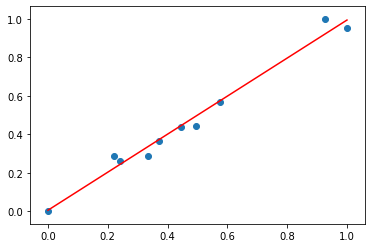

In [26]:
import matplotlib.pyplot as plt

# 设置两个终止条件
loop_max =10000
epsilon = 1e-6

# 初始化theta（权重）
np.random.seed(0)
theta = np.random.rand(n).T # 随机生成10以内的，n维1列的矩阵

# 初始化步长/学习率
alpha = 0.001
# 初始化迭代误差（用于计算梯度两次迭代的差）
error = np.zeros(n)

# 初始化偏导数矩阵
diff = np.zeros(n)# 初始化迭代误差（用于计算梯度两次迭代的差）
#print(diff)
# 初始化循环次数
count = 0

while count < loop_max:
    count += 1  # 每运行一次count加1，以此来总共记录运行的次数
    
    # 计算梯度
    for i in range(m):
        # 计算每个维度theta的梯度，并运用一个梯度去更新它
        diff = x_train[i].dot(theta)-y_train[i]
        #print(diff)
        theta = theta - alpha * diff*(x_train[i])
    #print(diff,theta)
    
    # else中将前一个theta赋值给error,theta - error便表示前后两个梯度的变化，当梯度
    #变化很小（在接收的范围内）时，便停止迭代。
    if np.linalg.norm(theta - error) < epsilon: # 判断theta与零向量的距离是否在误差内
        break
    else:
        error = theta  
        
print(theta)
plt.scatter(x_train[:,1],y_train)
pred_y= theta[1]*x_train[:,1]+theta[0]
plt.plot(x_train[:,1],pred_y,c='r')

theta设置为随机且循环1000次时，结果为[0.11206335 0.77391136]，循环10000次时，结果为[0.00539135 0.98867551]。设回归模型为y=0.00540+0.9986x，价格137归一化为0.2，带入回归模型，输出归一化结果为0.505，最终价格为292.5。从图形来看，回归模型的结果是正确的。

## 牛顿迭代法
### 基本原理及案例代码

牛顿迭代法，是一种快速迭代搜索法，主要用于求函数零点，即求方程的根。该算法要求目标函数具有二阶连续偏导数，因为下一个近似值需要通过在现有近似值附近进行一阶泰勒展开来确定。由微积分理论可知，任意$n$阶可导的函数都可以在任意点$X_k$处展开为幂函数形式，如下：$$f(X)=\sum_{n=0}^{\infty}\frac{f^{(n)}(X_k)}{n!}(X-X_k)^n \tag 1$$其中，$f^{(n)}(X_k)$为点$X_k$处的$n$阶导数值。

对于$f(X)=0$方程，如果是非线性方程，则取式（1）的线性部分，即$f(X)=f(X_k)+f^{'}(X_k)(X-X_k)=0$，若$f^{'}(X_k)\neq 0$，则可以得到$f(X)=0$的一个近似根，即$X=X_k-\frac{f(X_k)}{f^{'}(X_k)}$，将这个近似根作为新的起点，则可以得到迭代公式：$$X_{k+1}=X_k-\frac{f(X_k)}{f^{'}(X_k)}$$如果迭代初始值$X_0$选择得当，则可通过迭代得到方程$f(X)=0$的根为极限的收敛序列$\{X_k\}$。当$k$足够大时，可获得满足精度要求的方程近似根$X_k$。

迭代求函数根的原理可以通过下图说明，其中假设最优解为$r$：![jupyter](./img/model-3.jpg)

对于函数优化问题，目标函数的极值点为函数驻点，即为函数导函数的根。牛顿迭代法就可以求得导函数的根，由此获得目标函数的极值点。若$f(X)$为$F(X)$的导函数，则当$f(X)=0$时，$F(X)$在$X$处有极值点。

假设目标函数具有三阶导数，且$F''(X)\neq 0$，同理可得如下迭代式：$$X_{k+1}=X_k-\frac{F'(X_k)}{F''(X_k)}$$适当选择$X_0$，可使用上式收敛到$F'(X)=0$的根，即目标函数$F(X)$的极值点。

对于机器学习的目标函数或者代价函数，一般包含多个模型参数，使用牛顿迭代法，相当于求解多元目标函数的极小值点。故需要**将一元函数的迭代法推广到多元函数的情形。**

设$F(X)$为三次可微的$n$元函数，则由多元函数在$X_k$处泰勒展开，$$F(X)\approx F(X_k)+\nabla F(X_k)\cdot(X-X_k)+\frac{1}{2}(X-X_k)^T\nabla ^2F(X_k)\cdot(X-X_k) \tag 2$$其中，$X=(x_1,x_2,\dots,x_n)^T$，$F(X)$在$X=X_k$处的一阶导数$$\nabla F(X_k)=\left (\frac{\partial F}{\partial x_1},\frac{\partial F}{\partial x_2},\dots,\frac{\partial F}{\partial x_n}\right )^T$$

$𝐹(𝑋)$在$𝑋=𝑋_𝑘$处的二阶导是一个Hesse矩阵：
$$\nabla F(X_k)=
\begin{eqnarray*}\left (\matrix{
\frac{\partial^2F}{\partial x_1^2}&\frac{\partial^2F}{\partial x_1\partial x_2}&\dots& \frac{\partial^2F}{\partial x_1\partial x_n} \\
\frac{\partial^2F}{\partial x_2\partial x_1}&\frac{\partial^2F}{\partial x_2^2}&\dots& \frac{\partial^2F}{\partial x_2\partial x_n}\\
\cdots \\
\frac{\partial^2F}{\partial x_n\partial x_1}&\frac{\partial^2F}{\partial x_n\partial x_2}&\dots& \frac{\partial^2F}{\partial x_n^2}}
\right ) \end{eqnarray*}\tag 3$$

假定式（2）右边为$n$元正定二次凸函数，且存在唯一的最优解，则对式（2）求极值，可将$\nabla F(X)=0$近似表示成$$\nabla F(X)\approx \nabla F(X_k)+\nabla^2F(X_k)\cdot (X-X_k)=0$$求解迭代式为：$$X_{k+1}=X_k-[\nabla^2F(X_k)]^{-1}\nabla F(X_k)\tag 4$$可将其看成步长恒为1，方向为$P_k=-[\nabla^2F(X_k)]^{-1}\nabla F(X_k)$的迭代搜索。这个方向称为**牛顿方向**。

上述上述分析，可得牛顿迭代法的具体步骤：

1）设置初始点$X_k$和终止准则，并置$X_k=0$

2）求解点$X_k$对应的目标函数、梯度和Hesse矩阵

3）确定牛顿方向$P_k$

4）根据公式（4）确定下一个点$X_{k+1}$

5）判断终止条件，确定最优解或者转到步骤（2）

例子：下表式一个预测广告投入与净利润之间关系的机器模型，使用该模型预测广告投入为2.1万元时的净利润。要求模型优化过程采用牛顿迭代法。

In [27]:
import pandas as pd
pred={
    '广告投入X':[4.69,6.41,5.47,3.43,4.39,2.15,1.54,2.67,1.24,1.77,4.46,1.83,5.15,6.15],
    '净利润y':[12.23,11.84,12.25,11.10,11.97,8.75,7.75,10.50,6.71,7.60,12.46,8.47,12.27,12.02]
}
#定义数据库
predDf=pd.DataFrame(pred)
predDf

,广告投入X,净利润y
0,4.69,12.23
1,6.41,11.84
2,5.47,12.25
3,3.43,11.10
4,4.39,11.97
5,2.15,8.75
6,1.54,7.75
7,2.67,10.50
8,1.24,6.71
9,1.77,7.60


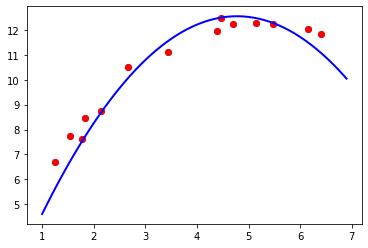

In [28]:
#数据可视化
import numpy as np
import matplotlib.pyplot as plt
X=predDf.iloc[:,0]#提取两列数据，分别作为x,y
y=predDf.iloc[:,1]
plt.scatter(X,y)

# 生成拟合曲线的绘制点
_X = np.arange(1, 7, 0.1) 
_Y = np.array([-0.145 + 5.313*x - 0.556*x**2 for x in _X])
 
plt.plot(X, y, 'ro', _X, _Y, 'b', linewidth=2) 
#plt.title("y = {} + {}x + {}$x^2$ ".format(a0, a1, a2)) 
plt.show()

通过数据散点图可以看出，可用二次函数拟合表中的数据。设学习模型为$y=w_0+w_1X+w_2X$，用误差平方和作为优化目标，为便于计算，优化目标函数定义为误差平方和的$\frac{1}{2}$。即$$E[W]=\frac{1}{2}\sum_{i=1}^n(y^i-y_p^i)=\frac{1}{2}\sum_{i=1}^n(y^i-w_2X^{i2}-w_1X^{i}-w_0)$$其中，$y^i$、$y_p^i$分别为第$i$个数据的真实值和预测值。

代入数据，得到目标函数$F(W)=F(w_0,w_1w_2)$,如设置初始点$W_0=(1,1,1)$，可以进一步求得$\nabla F(W_0)、\nabla F(w_0)$。 使用公式（4）不断迭代，满足结束条件时，得到模型$y=-0.556X^2+5.313X-0.145$。

### 牛顿迭代法的优缺点
该部分参考：https://my.oschina.net/u/3579120/blog/1508433

牛顿法优点：二阶收敛，收敛速度快；

牛顿法缺点：

1 牛顿法是一种迭代算法，每一步都需要求解目标函数的Hessian矩阵的逆矩阵，计算比较复杂。

2 可能发生被零除错误。当函数在它的零点附近，导函数的绝对值非常小时，运算会出现被零除错误。

3 是可能出现死循环。当函数在它的零点有拐点时，可能会使迭代陷入死循环。

4 定步长迭代。改进是阻尼牛顿法。


# 模型正则化策略

在机器学习的过程中，假设的模型空间有众多模型，不同的模型有不同的复杂度（例如，不同的个数），机器学习任务jiu是要选择逼近真实的模型。

如果一味追求提高对训练数据的预测能力，则选择的模型复杂度往往会比真实模型更高，出现训练误差较小而泛化误差较大的情形，这就是**过拟合(overfiting / high variance)现象**。也即，过拟合表现为模型在训练集上表现很好，但是在测试集上表现较差，模型的泛化能力弱。 一般而言，过拟合就是模型对训练数据的信息提取过多，不仅学习到了数据背后的规律，连数据噪声都当做规律学习了，以至于出现这一模型对已知数据预测的很好，但是对未知数据预测很差。机器学习的**模型选择问题**旨在避免过拟合并提高模型的预测能力。 

产生过拟合的原因很多，主要表现在以下几个方面：

    1）数据样本抽取错误。如样本数量太少，选择方法错误，样本标签错误等。导致选取的样本数据不足以代表预定的分类规则。
    2）数据太多，模型复杂度过高。
    3）样本噪音干扰过大。导致误认为是特征而干扰了分类规则。
    4）权值学习迭代次数过多。这样拟合了噪声和没有代表性的特征。
    
正则化策略是机器学习中十分常用的防止模型过拟合，提高模型的泛化能力的技术。其目的就是以增大训练误差为代价，来减少测试误差（如果在训练误差上很小，可能出现过拟合的情况）。正则化思想是在损失函数中加入刻画模型复杂程度的指标，这个指标一般是模型复杂度的单调递增函数，模型越复杂，正则化值越大。

下面介绍几种常用的正则化策略。

## 范数约束
通过对模型参数添加惩罚参数来限制模型能力，常用的就是在损失函数基础上添加范数约束。

通常情况下，深度学习中只对仿射参数添加约束，**对偏置项不加约束**。主要原因是偏置项一般需要较少的数据就能精确的拟合。如果添加约束常常会导致欠拟合。

范数约束一般分为：L1、L2 正则化，是通过在损失函数中添加一项对权重的约束来实现正则化的，L1 是求权重的绝对值之和，L2 是求权重的平方和。

具体来说，假设有训练样本集$S={(X_1,y_1),(X_2,y_2),\cdots,(X_n,y_n)}$，模型仿射参数$\beta=(\beta_1,\beta_2,\cdots,\beta_n)^T$，模型训练的误差函数为$$F(\beta)=\frac{1}{n}\sum_{X_i\in S}L(f(X_i)-y_i)$$

在损失函数上加上约束$a\lambda (\beta)$，得到新的目标函数$$F'(\beta)=\frac{1}{n}\sum_{X_i\in S}L(f(X_i)-y_i)+a\lambda (\beta)$$约束项$a\lambda (\beta)$中的$a$为大于0的超参数，为调整经验风险和正则化项之间关系的系数，值越大，对参数惩罚越严重。$\lambda (\beta)$是对参数向量的**惩罚形式**。

**$L^1$范数约束**

1-范数为$║\beta║_1=│\beta_1│+│\beta_2│+…+│\beta_n│$。模型越复杂，正则化权重$a$应该设置的越大。

可用梯度下降法最小化目标函数$F'(\beta)$，得到$$\nabla F'(\beta)=\frac{1}{n}\sum_{X_i\in S}\nabla _{\beta}L(f(X_i)-y_i)+asign(\beta)$$
其中，$sign(x)$是符号函数，对于任意的$\beta_i$，有
$$sign(\beta_i)=
\begin{eqnarray*}\left \{\matrix{
1,\beta_i>0\\
0,\beta_i=0\\
-1,\beta_i<0
}\right.  \end{eqnarray*}$$
参数更新公式如下：$$\beta^{k+1}=\beta^k-\epsilon a sign(\beta^k)-\epsilon \nabla F(\beta^k)$$

公式右侧的中间项是关键部分，对参数的取值做了一定的控制，即**使参数尽量向0靠拢**。因为，当$\beta_i>0$,减去了$|\epsilon a sign(\beta^k)|$，$\beta_i<0$，增加了中间项$|\epsilon a sign(\beta^k)|$。**因此，1-范数的基本目的是尽量产生稀疏的参数向量，即使得更多的参数为0**。这也意味着，降低了模型对数据的拟合能力，由此可以缓解过拟合现象。

**$L^2$范数约束**

2-范数为$║\beta║_2=(\beta_1^2+\beta_2^2+…+\beta_n^2)^{\frac{1}{2}}$。约束为2-范数时，新的目标函数$$F'(\beta)=\frac{1}{n}\sum_{X_i\in S}L(f(X_i)-y_i)+a\lambda (\beta)=\frac{1}{n}\sum_{X_i\in S}L(f(X_i)-y_i)+\frac{a}{2}║\beta║_2^2$$

用梯度下降法对目标函数最小值进行优化，得到$F'(\beta)$的梯度：$$\nabla F'(\beta)=\nabla F(\beta)+a\beta$$得到新的迭代公式$$\beta^{k+1}=\beta^k-\epsilon[a\beta^k+\nabla F(\beta^k)]=(1-\epsilon a)\beta^k-\epsilon \nabla F(\beta^k)$$

右边第一项比原参数减少了$\frac{1}{\epsilon a}$，故这种方法通常称为**权重衰减**。可以看到，2-范数约束并没有刻意促使某些参数为0，而是使得模型的所有参数都变小。

从优化或者数值计算的角度来说，如目标函数为二次函数，使用最小二乘法可以直接求解$$\hat \beta=(X^TX)^{-1}X^Ty$$但是若参数过多，特征维数大于样本数量时，上式无法求逆，难以直接求解。但是使用L2范数作为约束项后，目标函数转化为$$F(\beta)=(y-X\beta)^T(y-X\beta)+\frac{1}{2}a\beta^T\beta$$可以得到最优化的具体表现形式$$\hat \beta=(X^TX+aE)^{-1}X^Ty$$

## 样本增强

数据增强，也就是获取和使用更多的数据集。给与模型足够多的数据集，让它在尽可能多的数据上进行“观察”和拟合，从而进行不断修正。样本增强是一种基于扩充样本训练集的正则化策略，我们不可能收集无限多的数据集，所以通常的方法，就是对已有的数据添加大量的“噪音”，产生若干虚拟样本，比如图像，可以对其进行锐化、旋转、明暗度调整等。 

样本增强产生的虚拟样本必须具有一定的合理性，既要与现有样本保持一定的差异，又要服从一致的总体样本分布。

样本增强常用在图像领域，原因在于图像包含很多不改变原始信息表达的可变因素。

# 模型评估与选择

## 模型评估方法
若m个样本中有a个样本分类错误，则有下面的概念：

**错误率error rate**：分类错误的样本数占样本总数的比例$E=a/m$。

**精度accuracy**：分类正确的样本数占样本总数的比例$1-E$。

**误差error**：｜实际预测输出-样本真实输出｜。

**训练误差training error或经验误差empirical error**：学习器在训练集上的误差。

**泛化误差generalization error**：在新样本上的误差。

学习的理想情况：从训练样本中尽可能学出适用于所有潜在样本的“普通规律”。如果学习器把训练样本学的“太好”，很可能导致已将训练样本自身一些特点当作了潜在样本的共性，如些导致泛化性能下降，这种现象称为**过拟合（overfitting）**，主要是由于学习能力太强，导致把训练样本中的不太一般的特性都学到了。

如果训练器学习能力低下,对训练样本的一般性质未学好，则就是欠拟合underfitting。

欠拟合比较容易解决，过拟合则不太好解决，过拟合是机器学习面临的关键障碍，但过拟合是无法彻底避免的。

现实学习任务中，选择学习算法及确定参数配置即是“模型选择”（model selection）问题。理想的解决方案是对候选模型的**泛化误差**进行评估，选择泛化误差最小的模型。然而，jiqixuexi 无法直接获得泛化误差，在现实中，如何进行模型评估而选择模型呢？

由于无法获取所有样本上的泛化误差，因此一般只能以测试集上的“测试误差”（testing error）作为泛化误差的近似。测试集应尽可能与训练集互斥，即测试样本未在训练中使用过。

针对m个样本的数据集$D={(x_1,y_1),(x_2,y_2),…,(x_m,y_m)}$，如何划分出训练集S和测试集T？下面是几种常见的方法。

（1）**留出法hold-out**，将数据集直接划分成训练集S和测试集T，为保持划分出的数据集的数据分布的一致性，在分类任务中要保持样本类别比例相似，这种保留类别比例的采样方式一般称为“分层采样”（stratified sampling）,例如D共含500个正例，500个反例，分层采样30%作为测试样本，则S应包含350个正例，350个反例，T应包含150个正例，150个反例。

留出法有很多种划分S和T的方法，单次使用留出法，一般要采用若干次随机划分，重复实验评估后取平均值作为评估结果。S太大则训练出的模型更接近D，评估结果具有较好保真性（fidelity），但测试集T太小，评估结果不够稳定准确，反之评估结果的保真性又得不到保证，因此没有完美解决方案，常见做法约2/3~4/5的样本用于训练，剩余用于测试。

（2）**交叉验证法**，$D=D_1∪D_2∪…∪D_k，Di∩Dj=ϕ（i≠j）$，$D_i$均是分层采样，各子集互斥，每次用$k-1$个子集的并集作为训练集，余下那个子集作为测试集，可获得k组训练/测试集，可进行k次训练和测试，最终返回k个测试结果均值。交叉验证评估结果稳定性及保真性很大程度上取决于k的取值，通过称为**k折交叉验证**（k-fold cross validation），通常取10，或5、20。k组训练/测试集存在许多种划分方式，k折交叉验证通常随机使用不同划分重复p次，最终评估结果是这p次k折交叉验证结果的均值。

假定包含m个样本，令k=m，则得到交叉验证法的特例留一法（Leave-One-Out,简称LOO）。留一法的评估结果往往被认为较准确，但数据集较大时，计算开销难以忍受。

（3）**自助法bootstrapping**，因留出法与交叉验证法均要留一部分样本用于测试，因此评估模型用的训练集比D小，必然引入一些因训练样本规模不同导致的估计偏差（留一法受此影响最小，但计算复杂度太高了）。自助法是个较好的解决方法，它以自助采样法（bootstrap sampling）为基础，即对于容量为m的样本集D，采用有放回的采样方式，从中采取m个样本形成数据集D’，显然其中可能存在重复样本，经推算初始数据集D约有36.8%的样本未出现在D’中，于是将D’作为训练集，而D\D’作为测试集。样本始终不被采样到的概率计算$$(1-\frac{1}{m})^m=\frac{1}{m}=0.368$$

自助法适用于数据集较小、难以有效划分训练/测试集时很有用。由于自助法产生的数据集改变了 初始数据集的分布，会引入估计偏差，因此，在初始数据量足够时，留出法和交叉验证法更常用。


## 模型性能度量
对学习器的泛化性能进行评估，不仅需要有效可行的实验估计方法，还需要有衡量模型泛化能力的评价标准，这就是**性能度量**。

给定训练集$D={(x_1,y_1),(x_2,y_2),…,(x_m,y_m)}$，设有学习器$f$，要评价$f$的性能，就要将预测结果$f(x)$和真实标记$y$进行比较。

如均方误差$$E(f;D)=\frac{1}{m}\sum_1^m(f(x_i)-y_i)^2$$

对于数据分布D和概率密度函数$p(.)$，均方误差可描述为
$$E(f;D)=\int _{x\sim D}(f(x)-y)^2p(x)dx$$
对于分类问题，常用的度量标准如下。

**（1）错误率与精度**
错误率与精度自然就是算比例，最简单。错误率和精度分别定义如$$E(f;D)=\frac{1}{m}\sum_1^m\amalg (f(x_i)\neq y_i)$$

$$acc(f;D)=1-E(f;D)=\frac{1}{m}\sum_1^m\amalg (f(x_i)= y_i)$$

**(2)查准率、查全率与F1**
查准率、查全率等在信息检索、web搜索等应用中经常出现。设有分类结果的混淆矩阵confusion matrix，表示为下表，表中左半部分预测类别为正例，右半部分预测类别为反例，而样本中真实的正例类别在上半部分，下半部分为真实的反例。 

|真实情况|预测结果正例|预测结果反例|
|---|---|---|
|正例|TP（真正例）|FN（反正例）|
|反例|FP（假正例）|TN（真反例）|

所谓的查准率P和查全率R分别定义为：$$P=\frac{TP}{TP+FP}$$
$$R=\frac{TP}{TP+FN}$$

查准率也就是在所有预测结果为正例的情况下的真实比例。查全率是所有真实情况为正例的情况下预测正确的比例。所以它适用于二分类问题。

查准率和查全率是一对矛盾的度量。查准率的提高可以通过加大数据量来提高，但如此一来查全率就低了（分母大了）；同理，查全率高的时候，查准率往往偏低。在很多情况下，我们以查准率为纵轴，查全率为横轴作图，绘制P-R曲线。如图所示：![jupyter](./img/model-4.jpg)

当一个模型a的P-R曲线完全包住另一个模型b的P-R曲线时，即可认为a优于b。如果两个模型的曲线有交叉，则难以断定优劣。如果确实要比较孰优孰劣，则比较曲线下的面积，但是面积难以估算。

所以一般会综合两方面考量学习器的好坏，找到**最佳平衡点BEP**（Break-Even Point）。衡点定义是查全率等于查准率时的取值。BEP过于简化，更常用的是F1变量，本质上是P和R的调和平均。 
$$F1=\frac{2\times P\times R}{P+R}=\frac{2\times TP}{样例总数+TP-TN}$$

**（3）ROC与AUC**

在混淆矩阵confusion matrix中，样本中的真实正例类别总数即$TP+FN$。TPR即True Positive Rate，$$TPR = \frac{TP}{TP+FN}$$ 
同理，样本中的真实反例类别总数为$FP+TN$。FPR即False Positive Rate，$$FPR=\frac{FP}{TN+FP}$$

还有一个概念叫**“截断点”**。机器学习算法对测试样本进行预测后，可以输出各样本对某个类别的相似度概率。“最有可能”是正例的排在前面，“最不可能”是正例的排在后面，分类过程就是就这个排序表中以某个截断点将样本分为两部分，前一部分位正例，后一部分为负例。

截断点取不同的值，TPR和FPR的计算结果也不同。将截断点不同取值下对应的TPR和FPR结果画于二维坐标系中得到的曲线，就是**ROC曲线**，全称是“受试者工作特征”( Receiver Operating Cha\fracteristic Curve )，描述的 TPR与 FPR 之间关系的曲线。横轴用FPR表示。如下图![jupyter](./img/model-5.jpg)


实际应用中，设定不同的截断点，得到若干离散点对（假正例率，真正例率），从而绘制出ROC曲线。使用不同的模型，得到不同的ROC曲线。若一个ROC曲线被另外一个ROC曲线包住，则后者的性能优于前者；如果有交叉，则较为合理的判据是比较ROC曲线下的面积，即AUC，很明显，模型的 AUC 越高，模型的二分类性能就越强。假设ROC曲线（上图右）有m个离散点，则AUC 的计算公式如下：$$AUC=\frac{1}{2}\sum_{i=1}^{m-1}(x_{i+1}-x_i)(y_i+y_{i+1})$$

**(4)其他方法**

    代价敏感错误率和代价曲线：略
    比较检验：略
    偏差与方差：
    
偏差-方差分解是解释学习器泛化性能的重要工具。在学习算法中，**偏差**指的是预测的期望值与真实值的偏差，**方差**则是每一次预测值与预测值的期望之间的差均方。实际上，偏差体现了学习器预测的准确度，而方差体现了学习器预测的稳定性。通过对泛化误差的进行分解，可以得到：

    •期望泛化误差=方差+偏差 
    •偏差刻画学习器的拟合能力
    •方差体现学习器的稳定性

易知：方差和偏差具有矛盾性，这就是常说的偏差-方差窘境（bias-variance dilamma），随着训练程度的提升，期望预测值与真实值之间的差异越来越小，即偏差越来越小，但是另一方面，随着训练程度加大，学习算法对数据集的波动越来越敏感，方差值越来越大。换句话说：在欠拟合时，偏差主导泛化误差，而训练到一定程度后，偏差越来越小，方差主导了泛化误差。因此训练也不要贪杯，适度辄止。[jupyter](./img/model-6.png)
